In [27]:
!sudo apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [28]:
!sudo apt install tesseract-ocr
!pip install pytesseract

# Import the pytesseract module
import pytesseract

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [29]:
import cv2
import pytesseract

img = cv2.imread('/content/Original_image.png')
print(img.shape)
# img = cv2.imread('/content/img_00018.jpg')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

(252, 338, 3)


'a\nPs\noe\noo\nA 7|\n0 GE\nseo =:\n\\\n\now)\nmm\n\n. om DCO\n\x0c'

(252, 338, 3)
(252, 338)


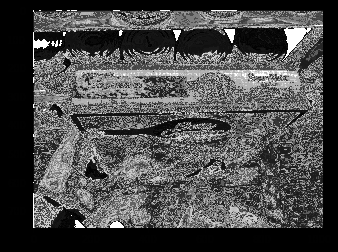

In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from google.colab.patches import cv2_imshow


img = cv2.imread('/content/Original_image.png')
print(img.shape)

# Reshape the image to 2D for DBSCAN
# We'll use the grayscale version of the image,
# which is effectively reducing the features to 1 (intensity).
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Z = gray.reshape(-1, 1) # Reshape to (n_samples, n_features) where n_features = 1

db = DBSCAN(eps=0.3, min_samples=100).fit(Z)
# Fit DBSCAN on the reshaped data

# Reshape the labels back to the original image shape
s = np.uint8(db.labels_.reshape(img.shape[:2]))

print(s.shape)
cv2_imshow(s)

In [31]:
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

# Make sure the image 'img_00018.jpg' is in the correct directory (e.g., '/content/')
# If not, upload the image to the '/content/' directory
# Verify the image filename is correct (case-sensitive)
# Use the following path if the image is in your Google Drive:
# img_path = '/content/drive/MyDrive/YourFolder/

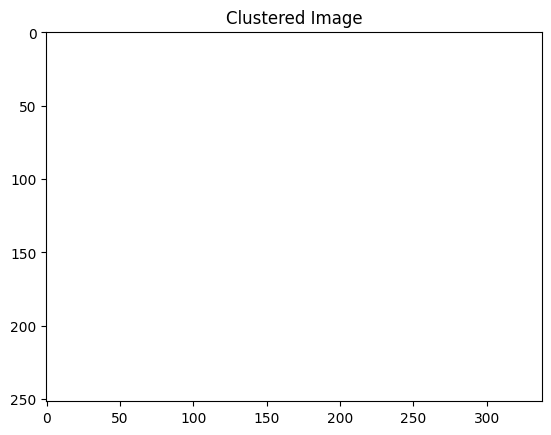

In [32]:

# For clustering the image using k-means, we first need to convert it into a 2-dimensional array
image_2D = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
# tweak the cluster size and see what happens to the Output
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2D)
clustered = kmeans.cluster_centers_[kmeans.labels_]
# Reshape back the image from 2D to 3D image
clustered_3D = clustered.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(clustered_3D)
plt.title('Clustered Image')
plt.show()

In [33]:
# print(clustered_3D*255)
custom_config = r'--oem 3 --psm 6'
inx = clustered_3D.astype(np.uint8)

pytesseract.image_to_string(inx, config=custom_config)


'wy\na\n2D =\noS =\na Sn : 7\nEn\na! A\n\n*\n7D te\nbs SS\n\x0c'

In [34]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [35]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

# Make sure the image 'img_00018.jpg' is in the correct directory (e.g., '/content/')
# If not, upload the image to the '/content/' directory
# Verify the image filename is correct (case-sensitive)
image_path_in_colab = '/content/Original_image.png'  # Changed filename to img_00018.jpg

# Verify if the file exists
if os.path.exists(image_path_in_colab):
    extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
    print(extractedInformation)
else:
    print(f"Error: File not found at {image_path_in_colab}")

 

200 600 001000



In [36]:
print(pytesseract.image_to_boxes(Image.open(image_path_in_colab)))

~ 0 0 338 252 0
2 74 0 89 28 0
0 83 9 93 17 0
0 94 9 99 17 0
6 193 0 203 28 0
0 197 9 207 17 0
0 208 9 212 17 0
0 254 9 264 17 0
0 265 9 270 17 0
1 299 9 313 17 0
0 308 9 318 17 0
0 319 9 324 17 0
0 325 9 331 17 0



(252, 338)
(5040, 6760)


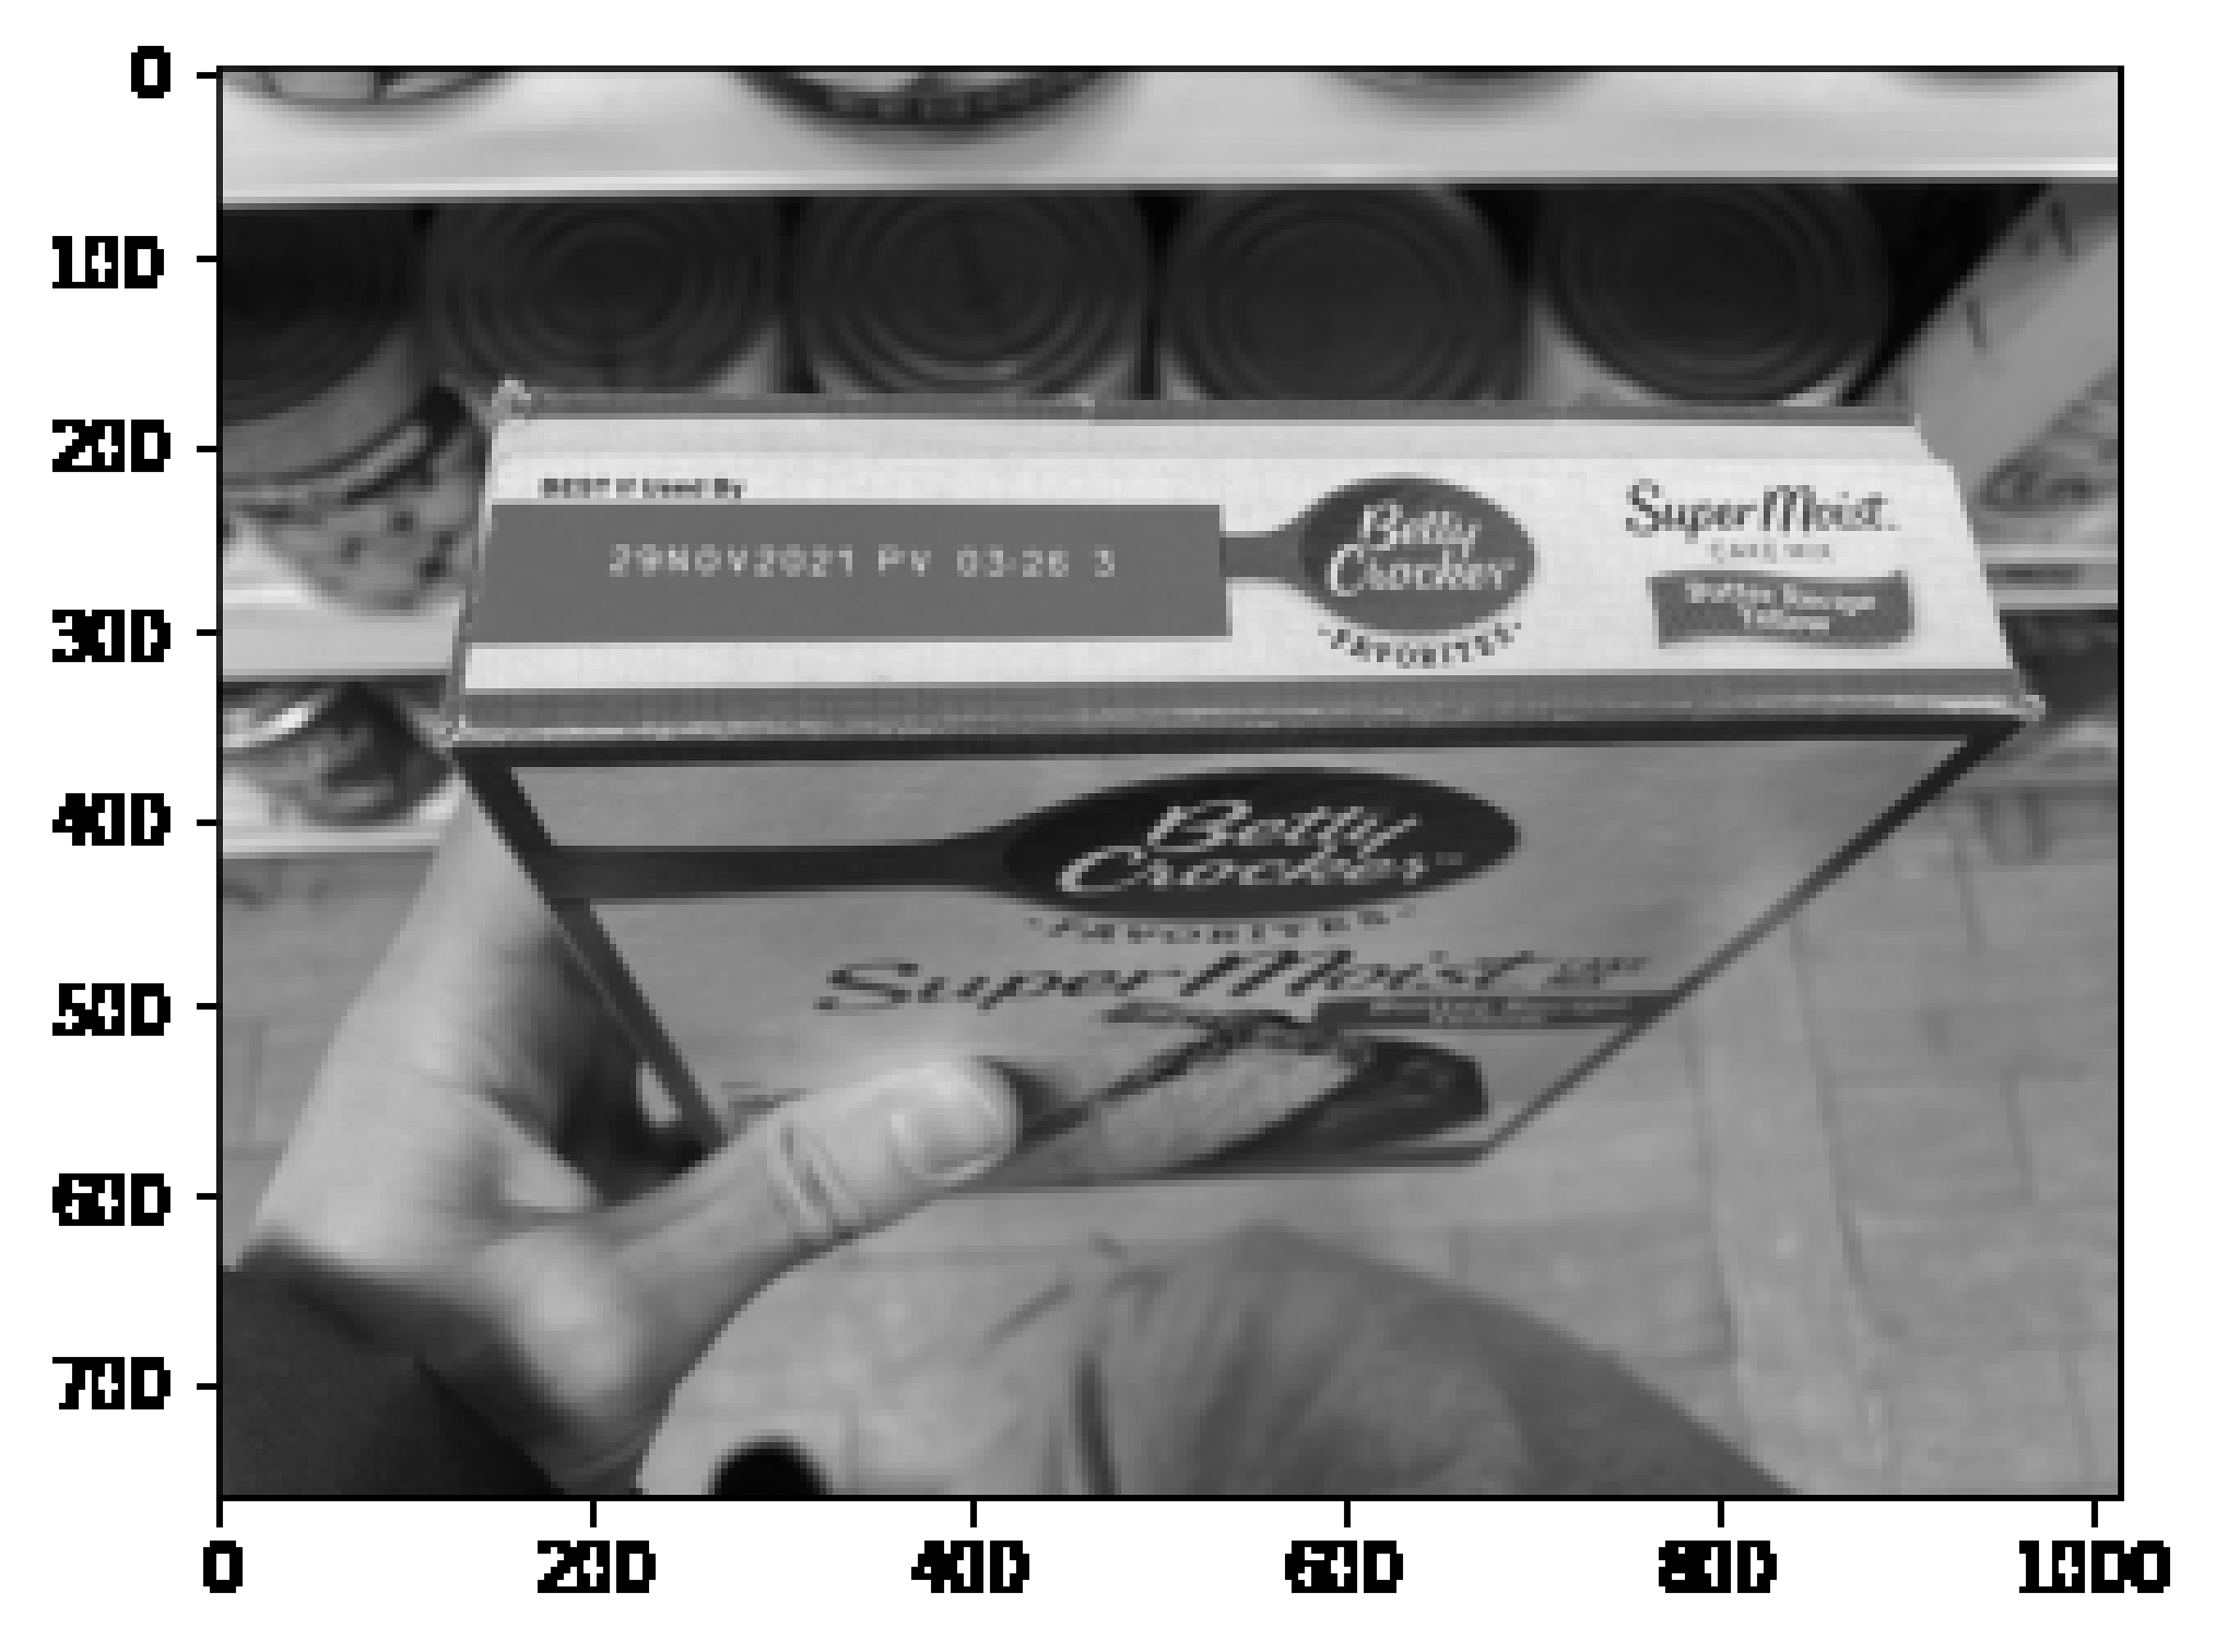

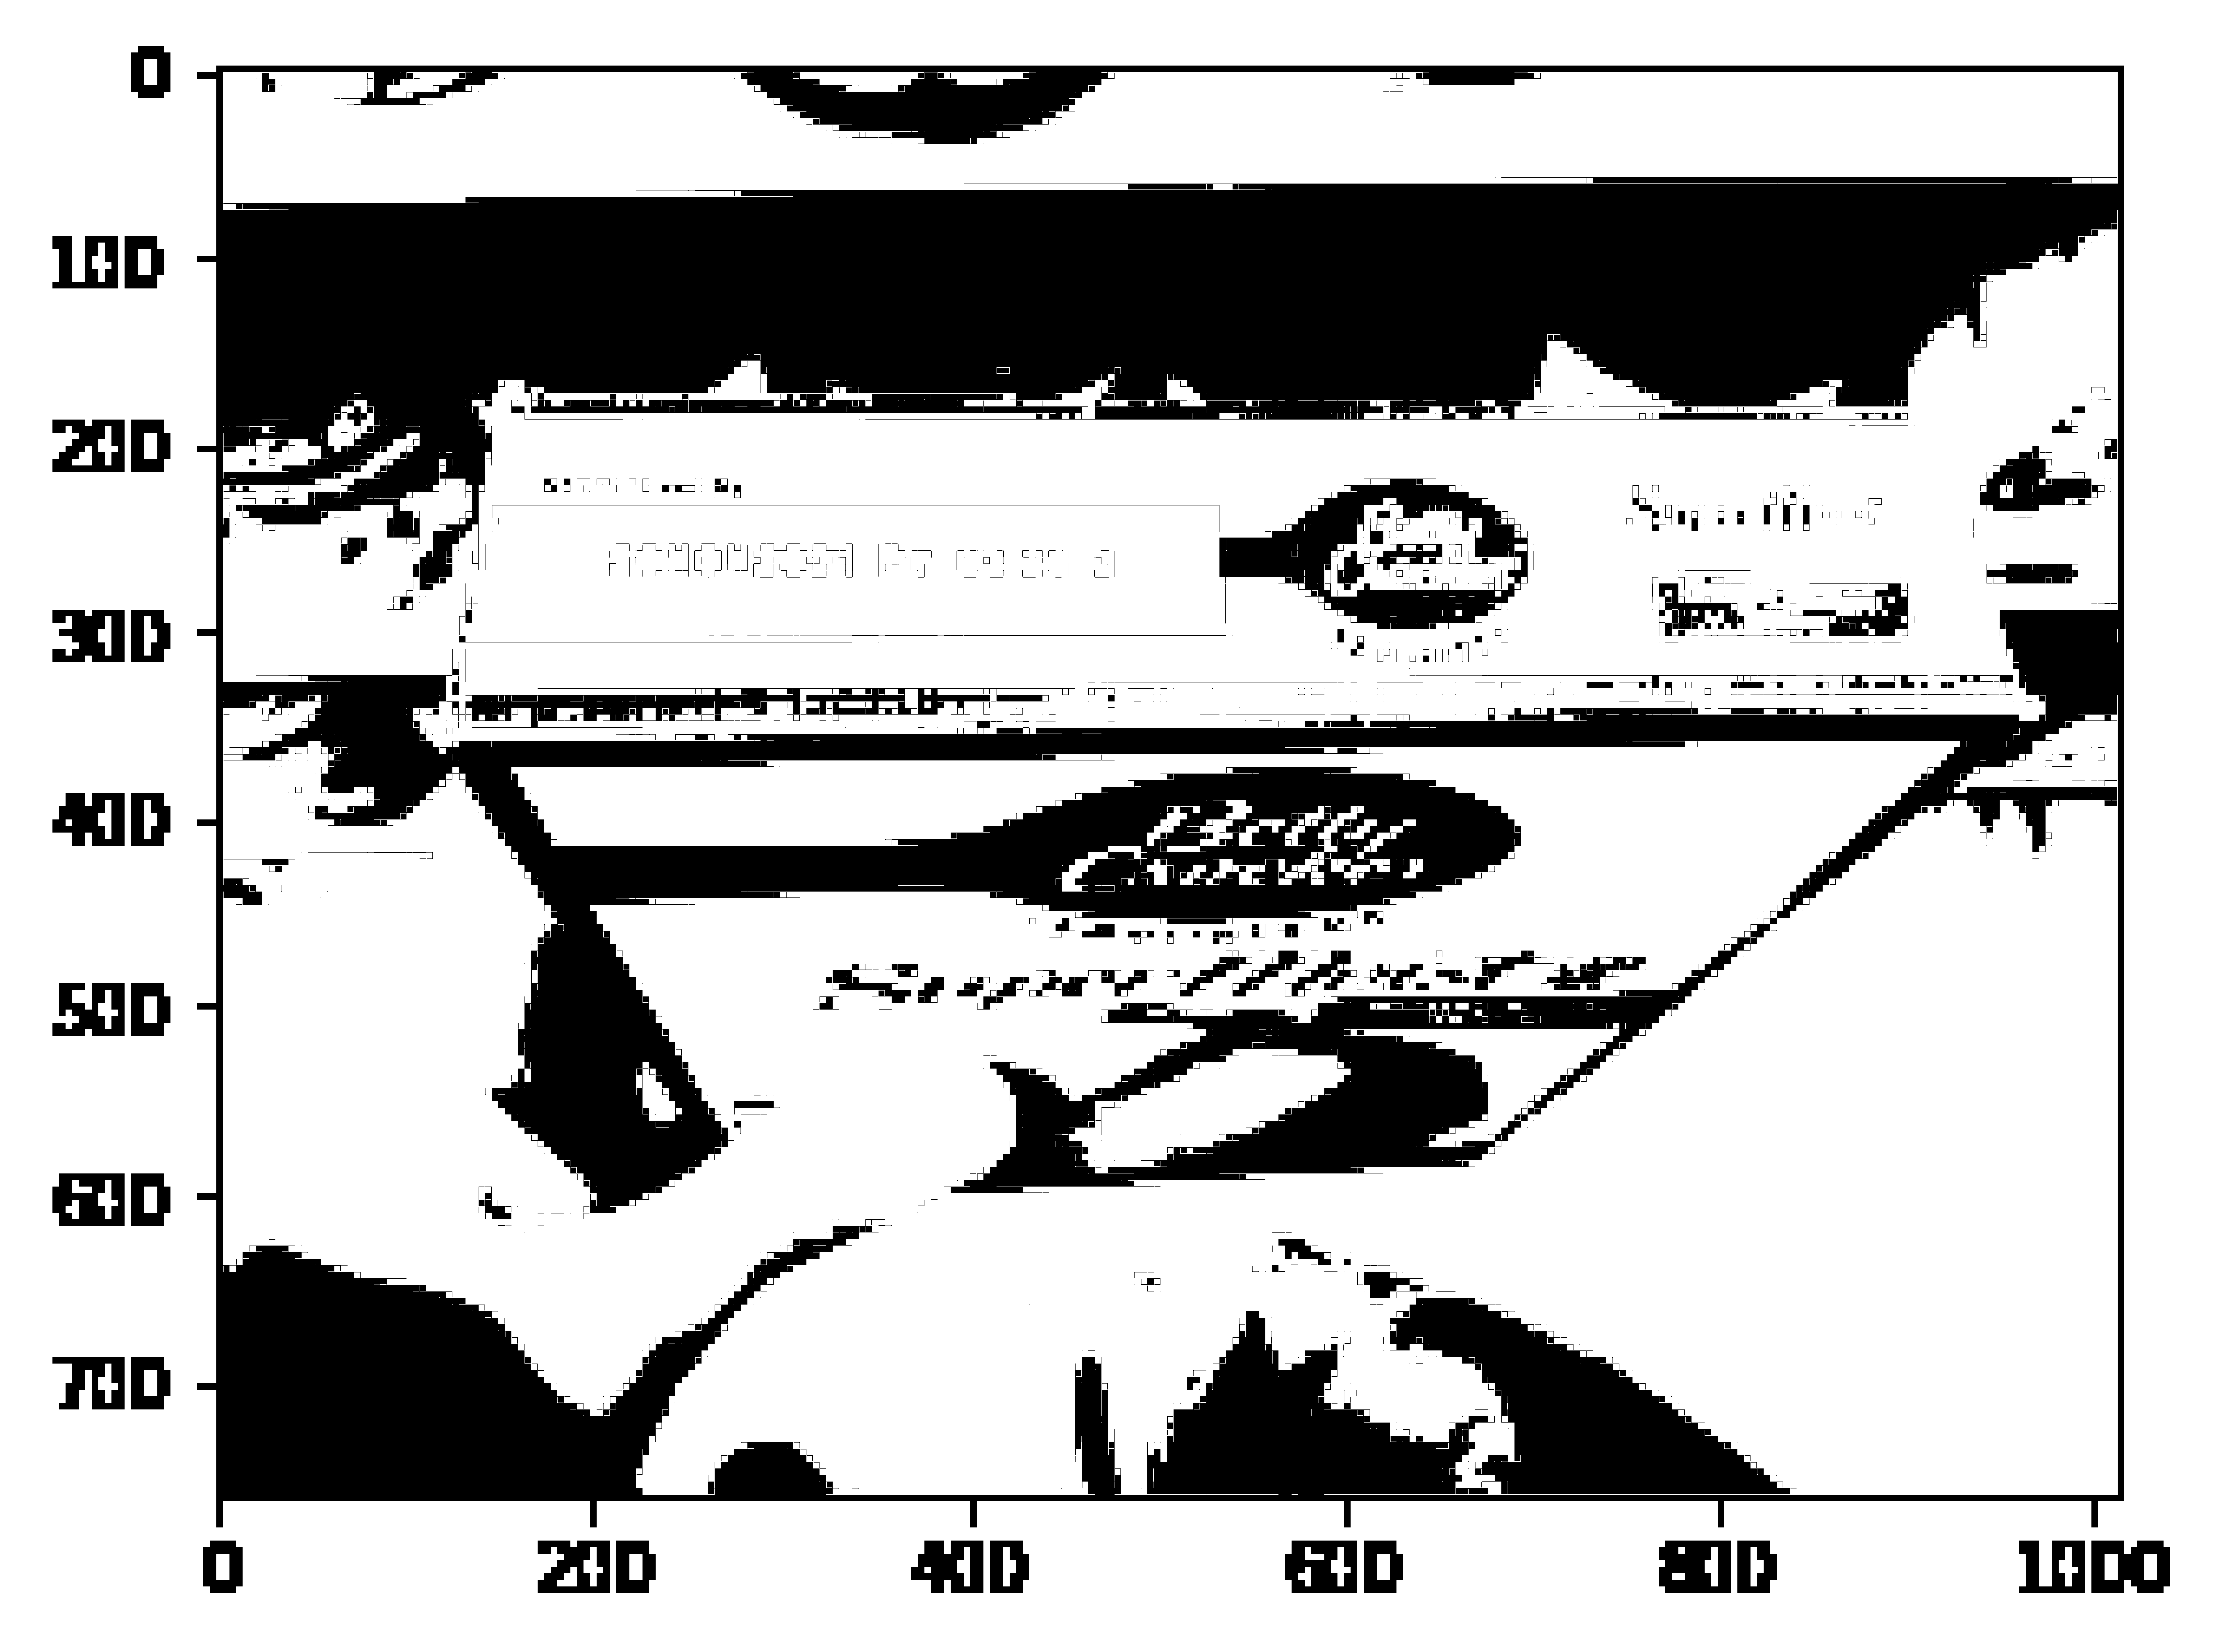

In [37]:
im_gray = cv2.imread('/content/Original_image.png', cv2.IMREAD_GRAYSCALE)
print(im_gray.shape)
# cv2_imshow(im_gray)
# print(im_gray.shape)
scaled = (im_gray.shape[1] * 20, im_gray.shape[0] * 20)
im_gray = cv2.resize(im_gray, scaled, interpolation = cv2.INTER_AREA)
print(im_gray.shape)


gaussian_3 = cv2.GaussianBlur(im_gray, (5,5), 10.0)
unsharp_image = cv2.addWeighted(im_gray, 2.0, gaussian_3, -1.0, 0)
cv2_imshow(unsharp_image)


thresh = 100
im_bw = cv2.threshold(unsharp_image, thresh, 255, cv2.THRESH_BINARY)[1]
# cv2.imwrite('blackwhite.png', im_bw)
cv2_imshow(im_bw)


In [ ]:
dst = cv2.fastNlMeansDenoising(unsharp_image,None,10,11,31)
cv2_imshow(dst)

In [ ]:
thresh = 90
im_bw = cv2.threshold(dst, thresh, 255, cv2.THRESH_BINARY)[1]
# cv2.imwrite('blackwhite.png', im_bw)
cv2_imshow(im_bw)

In [ ]:
kernel = np.ones((5, 5),np.uint8)
dilation = cv2.erode(im_bw,kernel,iterations = 1)
# opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)
cv2_imshow(dilation)
# cv2_imshow(opening)

In [ ]:
kernel = np.ones((7,7),np.float32)/25
dst = cv2.filter2D(dilation,-1,kernel)
cv2_imshow(dst)

In [ ]:
np.unique(dst == unsharp_image)

In [ ]:
se=cv2.getStructuringElement(cv2.MORPH_RECT , (100,100))
bg=cv2.morphologyEx(im_bw, cv2.MORPH_DILATE, se)
out_gray=cv2.divide(im_bw, bg, scale=255)
out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1]
cv2_imshow(out_binary)

In [ ]:
# kernel = np.array([[-1,-1,-1], [-1,11,-1], [-1,-1,-1]])
# im_sharp = cv2.filter2D(im_bw, -1, kernel)
# cv2_imshow(im_sharp)
custom_config = r'--psm 6'
extractedInformation = pytesseract.image_to_string(dilation, config = custom_config)
print(extractedInformation)


In [ ]:
# Load the library
import cv2
import pytesseract

# Initialize the list
img_lst = ["/content/Original_image.png",]

# For each image name in the list
for name in img_lst:

    # Load the image
    img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
    cv2_imshow(img)
    scaled = (img.shape[1] * 5, img.shape[0] * 5)
    av = cv2.resize(img, scaled, interpolation = cv2.INTER_AREA)

    # Convert to gry-scale
    # gry = cv2.cvtColor(av, cv2.COLOR_BGR2GRAY)
    gry = av

    # Erode the image
    erd = cv2.erode(gry, None, iterations=1)



    # thresh = 60
    # im_bw = cv2.threshold(erd, thresh, 255, cv2.THRESH_BINARY)[1]
    plt.imshow(erd, cmap = 'gray')
    plt.show()
    # OCR with assuming the image as a single uniform block of text
    txt = pytesseract.image_to_string(im_bw, config="--psm 6")
    print(txt)
